### Imports

In [1]:
import pandas as pd
import numpy as np

### Matplotlib, Seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# Estilos de Seaborn
sns.set()
sns.set_palette(palette='colorblind')

### Carga de datos

In [3]:
# Columnas a cargar
columnas_cargar = ["date", "device_id", "platform", "ref_type_id", "source_id"]
# Definicion de tipos
tipos = {"device_id" : np.int64,
         "platform" : np.int8,
         "ref_type_id" : np.int8,
         "source_id" : np.int8}
# Carga de datos
auctions = pd.read_csv("../../../data/auctions.csv", usecols=columnas_cargar, dtype=tipos, parse_dates=["date"])

# Preguntas 

# ¿Cuáles son los 10 dispositivos que más aparecieron en subastas?

In [4]:
top_10_dispositivos = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns = {"platform" : "apariciones"}).nlargest(10, "apariciones")

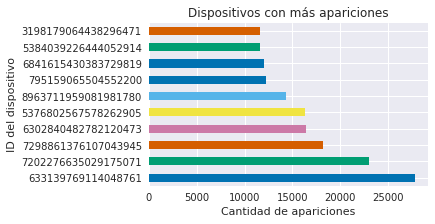

In [83]:
plt.figure(figsize=(5, 3))
top_10_dispositivos["apariciones"].plot(kind="barh")
plt.title("Dispositivos con más apariciones")
plt.xlabel("Cantidad de apariciones")
plt.ylabel("ID del dispositivo");
plt.savefig("figuras/dispositivos_mas_apariciones.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cuántos dispositivos diferentes aparecieron en subastas?

In [35]:
len(auctions["device_id"].value_counts())

206977

# ¿Cómo se distribuye la cantidad de apariciones en subastas por dispositivo?

In [15]:
apariciones = auctions.groupby("device_id").agg({"platform" : "count"}).rename(columns={"platform" : "apariciones"})

/opt/anaconda/3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


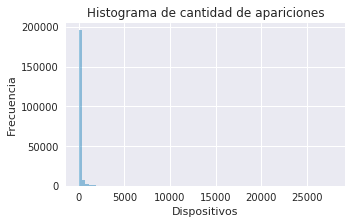

In [109]:
plt.figure(figsize=(5, 3))
sns.distplot(apariciones["apariciones"], bins=75, kde=False)
plt.title("Histograma de cantidad de apariciones")
plt.xlabel("Dispositivos")
plt.ylabel("Frecuencia");
plt.savefig("figuras/apariciones_por_dispositivo.eps", dpi=300, format="eps", bbox_inches = "tight")

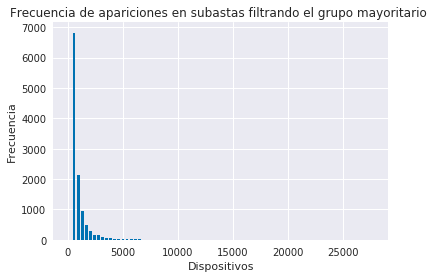

In [107]:
hist, bins = np.histogram(apariciones["apariciones"], bins=75)

freq = 50000

hist[np.where(hist >= freq)] = 0

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title("Frecuencia de apariciones en subastas filtrando el grupo mayoritario ")
plt.xlabel("Dispositivos")
plt.ylabel("Frecuencia")
plt.savefig("figuras/apariciones_por_dispositivo_zoom.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cómo se distribuye la cantidad de subastas según el día?

In [37]:
# Filtro desde miércoles hasta martes, para no sumar datos de dos días. Me interesa la semana desde el miércoles inclusive hasta el martes inclusive.
filtro = (auctions["date"].dt.day > 5) & (auctions["date"].dt.day < 13)
subastas_por_dia = auctions.loc[filtro] \
                           .groupby(auctions["date"].dt.dayofweek) \
                           .agg({"device_id" : "count"}) \
                           .rename(columns={"device_id" : "cantidad de subastas"})


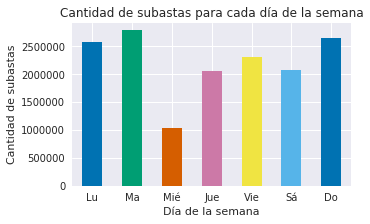

In [112]:
plt.figure(figsize=(5, 3))
subastas_por_dia["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de subastas para cada día de la semana")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Día de la semana")
plt.xticks(np.arange(7),["Lu", "Ma", "Mié", "Jue", "Vie", "Sá", "Do"], rotation="horizontal");
plt.savefig("figuras/subastas_segun_dia.eps", dpi=300, format="eps", bbox_inches = "tight")

In [99]:
subastas_por_dia_sin_filtrar = auctions.groupby(auctions["date"].dt.dayofweek) \
                           .agg({"device_id" : "count"}) \
                           .rename(columns={"device_id" : "cantidad de subastas"})


In [104]:
subastas_por_dia_sin_filtrar.iloc[1] = subastas_por_dia_sin_filtrar.iloc[1] / 2
subastas_por_dia_sin_filtrar.iloc[2] = subastas_por_dia_sin_filtrar.iloc[2] / 2

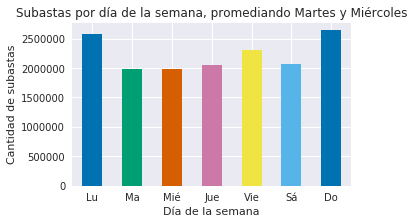

In [113]:
plt.figure(figsize=(5, 3))
subastas_por_dia_sin_filtrar["cantidad de subastas"].plot(kind="bar")
plt.title("Subastas por día de la semana, promediando Martes y Miércoles")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Día de la semana")
plt.xticks(np.arange(7),["Lu", "Ma", "Mié", "Jue", "Vie", "Sá", "Do"], rotation="horizontal");
plt.savefig("figuras/subastas_segun_dia_promedio.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Varía la cantidad de subastas entre el Martes 5/3 y el Martes 12/3?

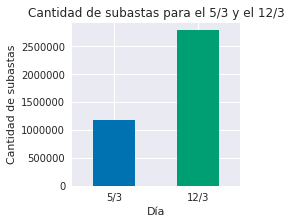

In [114]:
martes_5 = auctions["date"].dt.day == 5
martes_12 = auctions["date"].dt.day == 12
martes = auctions.loc[martes_5 | martes_12].groupby(auctions["date"].dt.day).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})
plt.figure(figsize=(3, 3))
martes["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de subastas para el 5/3 y el 12/3")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Día")
plt.xticks(np.arange(2),["5/3", "12/3"], rotation="horizontal");
plt.savefig("figuras/subastas_martes_5_vs_12.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Varía la cantidad de subastas entre el Miércoles 6/3 13/3?

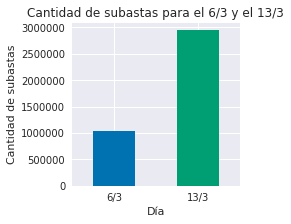

In [115]:
miercoles_6 = auctions["date"].dt.day == 6
miercoles_13 = auctions["date"].dt.day == 13
martes = auctions.loc[miercoles_6 | miercoles_13].groupby(auctions["date"].dt.day).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})
plt.figure(figsize=(3, 3))
martes["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de subastas para el 6/3 y el 13/3")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Día")
plt.xticks(np.arange(2),["6/3", "13/3"], rotation="horizontal");
plt.savefig("figuras/subastas_miercoles_6_vs_13.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cómo se distribuye la cantidad de subastas según el día?

In [38]:
subastas_por_dia_todos = auctions.groupby(auctions["date"].dt.day) \
                           .agg({"device_id" : "count"}) \
                           .rename(columns={"device_id" : "cantidad de subastas"})

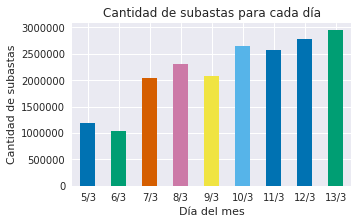

In [116]:
plt.figure(figsize=(5, 3))
subastas_por_dia_todos["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de subastas para cada día")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Día del mes")
plt.xticks(np.arange(9),["{}/3".format(x) for x in range(5,14)], rotation="horizontal");
plt.savefig("figuras/cantidad_subastas_por_dia.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cómo se distribuye la cantidad de subastas según el horario?

In [42]:
subastas_por_hora = auctions.groupby(auctions["date"].dt.hour).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})

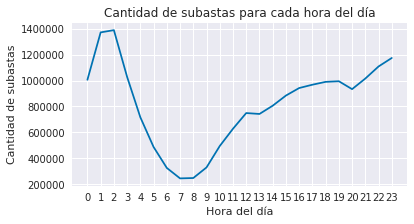

In [117]:
plt.figure(figsize=(6, 3))
subastas_por_hora["cantidad de subastas"].plot(kind="line")
plt.title("Cantidad de subastas para cada hora del día")
plt.ylabel("Cantidad de subastas")
plt.xlabel("Hora del día");
plt.xticks(np.arange(24),["{}".format(x) for x in range(0,24)], rotation="horizontal");
plt.savefig("figuras/cantidad_subastas_por_hora.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cómo se comporta la cantidad de subastas por hora y según la plataforma?

In [153]:
subastas_por_hora_y_plataforma = auctions.groupby([auctions["platform"], auctions["date"].dt.hour]).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})
subastas_por_hora_y_plataforma = subastas_por_hora_y_plataforma.unstack().T
subastas_por_hora_y_plataforma.reset_index(inplace=True)
del subastas_por_hora_y_plataforma["level_0"]
subastas_por_hora_y_plataforma.columns = ["Hora", "Android", "iOS"]

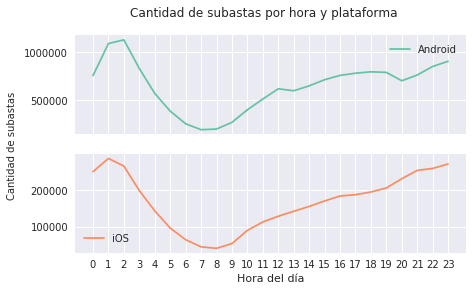

In [208]:
f, axarr = plt.subplots(2, sharex=True, figsize=(7,4))
f.suptitle("Cantidad de subastas por hora y plataforma")
subastas_por_hora_y_plataforma["Android"].plot(kind="line", color=sns.color_palette("Set2")[0], ax=axarr[0], legend=True)
subastas_por_hora_y_plataforma["iOS"].plot(kind="line", color=sns.color_palette("Set2")[1], ax=axarr[1], legend=True)
for ax in axarr.flat:
    ax.set(xlabel='Hora del día')
    ax.set_xticks(np.arange(24))
f.text(-0.01, 0.5, 'Cantidad de subastas', va='center', rotation='vertical')
plt.savefig("figuras/cantidad_subastas_por_hora_plataforma.eps", dpi=300, format="eps", bbox_inches = "tight");

# ¿Hay más subastas en los días de semana que en los fines de semana?

In [50]:
finde = (auctions["date"].dt.dayofweek > 3)
semana_vs_finde = auctions.groupby(finde).agg({"device_id" : "count"}).rename(columns={"device_id" : "cantidad de subastas"})

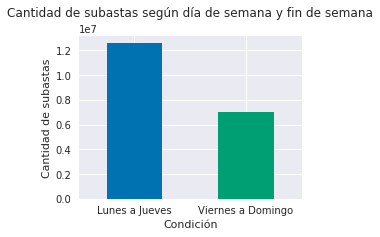

In [118]:
plt.figure(figsize=(4, 3))
semana_vs_finde["cantidad de subastas"].plot(kind="bar")
plt.title("Cantidad de subastas según día de semana y fin de semana", y=1.08)
plt.ylabel("Cantidad de subastas")
plt.xlabel("Condición")
plt.xticks(np.arange(2),["Lunes a Jueves", "Viernes a Domingo"], rotation="horizontal");
plt.savefig("figuras/subastas_semana_vs_finde.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿De qué plataforma provienen los dispositivos que aparecen en las subastas?

In [54]:
plataformas = auctions[["device_id", "platform"]].drop_duplicates()["platform"].value_counts()

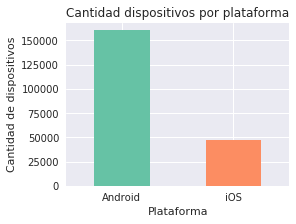

In [92]:
plt.figure(figsize=(4, 3))
plt.title("Cantidad dispositivos por plataforma")
plt.ylabel("Cantidad de dispositivos")
plt.xlabel("Plataforma")
plataformas.plot.bar(color=sns.color_palette("Set2"))
plt.xticks(np.arange(2),["Android", "iOS"], rotation="horizontal");
plt.savefig("figuras/subastas_por_plataforma.eps", dpi=300, format="eps", bbox_inches = "tight")

# ¿Cómo evoluciona la proporcion en la cantidad de subastas según la plataforma?

In [57]:
auctions["day"] = auctions["date"].dt.day.astype(np.int8)

In [58]:
auctions["hour"] = auctions["date"].dt.hour.astype(np.int8)

In [59]:
auctions["minute"] = auctions["date"].dt.minute.astype(np.int8)

In [60]:
agrupado = auctions.groupby(["platform", "day", "hour", "minute"]).agg({"device_id" : "count"})

In [61]:
n_auctions = agrupado.pivot_table(index="platform", columns=["day", "hour", "minute"], values=["device_id"]).T.fillna(0).cumsum()

In [62]:
n_auctions.reset_index(inplace=True)

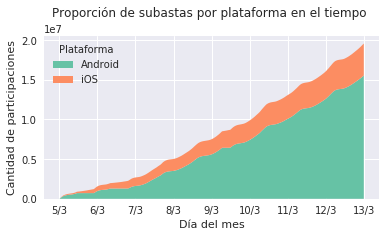

In [93]:
x= np.arange(12908)
y= [n_auctions[1], n_auctions[2]]

nombres = ["Android", "iOS"]

# Plot
plt.figure(figsize=(6, 3))
plt.stackplot(x, y, labels=nombres, colors=sns.color_palette("Set2"))
plt.legend(loc='upper left', title='Plataforma')
plt.title('Proporción de subastas por plataforma en el tiempo ', y=1.08)
plt.xlabel('Día del mes')
plt.ylabel('Cantidad de participaciones')
plt.xticks(np.arange(0, 12908, 1613),["{}/3".format(i) for i in range(5,14)], rotation="horizontal");
plt.savefig("figuras/evolucion_proporcion_por_plataforma.eps", dpi=300, format="eps", bbox_inches = "tight")